In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_context("talk")
%matplotlib inline
import collections
import csv
import datetime
import sys

In [6]:
spend_data = pd.read_csv("spend-data-by-account.csv")
project_data = pd.read_csv("projects.csv")

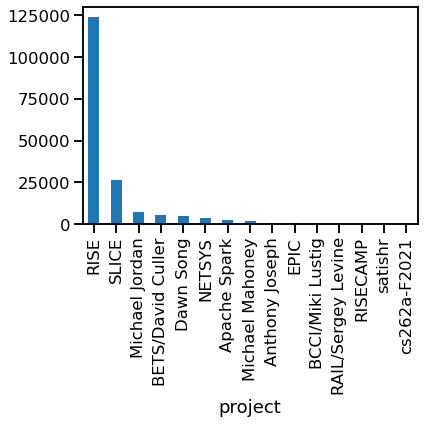

In [58]:
project_spends = pd.DataFrame()
project_spends["project"] = project_data["NAME"]

spends = list()
for p in project_data["NAME"]:

    sd = spend_data[spend_data.project == p]["spend"]
    sd2 = spend_data[spend_data.parent == p]["spend"]
    spend = sd.sum() + sd2.sum()
    spends.append(spend)

project_spends["spend"] = spends
#print(project_spends)

project_spends.groupby("project")['spend'].sum().sort_values(ascending=False).plot(kind="bar")
plt.savefig("spends-by-project.png", bbox_inches="tight")

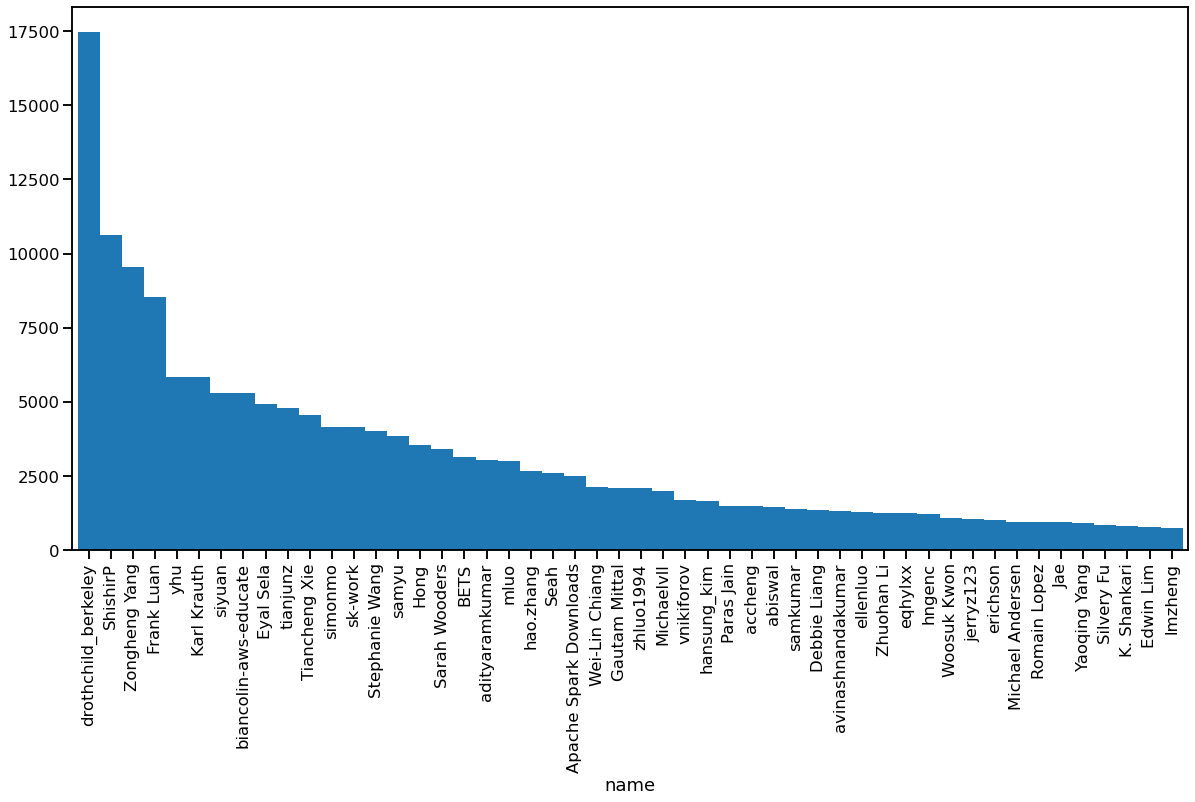

In [63]:
spend_data.groupby('name')['spend'].sum().sort_values(ascending=False).head(50).plot(kind="bar", figsize=(20,10), width=1)
plt.savefig("spends-by-user.png", bbox_inches="tight")